# Construimos un algoritmo que arme una red según las especificaciones
En este caso será para una red con una sola capa oculta y con la posibilidad de escoger la funcion de activación de la capa oculta así como el número de nodos que tendrá. Los nodos de las capas de entrada y salida estarán definidos por los propios datos X,Y

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import floor

In [2]:
# RELU
def relu(x):
    return x * (x > 0)

def drelu(x):
    return 1. * (x > 0)

#IDENTIDAD
def iden(X):
    return X

def diden(X):
    return 1

#SIGMOIDE
def sigmoid(X):
    return 1/(1.0+np.exp(-X))

def dsigmoid(X):
    return sigmoid(X)*(1-sigmoid(X))

# #### Miscellaneous functions
# def sigmoid(z):
#     """The sigmoid function."""
#     return 1.0/(1.0+np.exp(-z))

# def sigmoid_prime(z):
#     """Derivative of the sigmoid function."""
#     return sigmoid(z)*(1-sigmoid(z))

#TANGENTE HIPORBÓLICA
def tanh(X):
    return np.tanh(X)
def dtanh(X):
    return 1-tanh(X)**2


In [3]:
def split(X, Y, p_split): #El p_split debe estar dado entre 0 y 1
    nparams = len(X)
    randomize = np.random.permutation(nparams)
    X = X[randomize]
    Y = Y[randomize]
    ntrain = int(p_split * nparams)
    indx = [ntrain]
    X_train, X_test = np.split(X, indx)
    Y_train, Y_test = np.split(Y, indx)
    
    return X_train, Y_train, X_test, Y_test

In [4]:
#función de coste:
def error(vector):
    m = len(vector)
    mse = (1/(2*m))*np.linalg.norm(vector)**2
    return mse

In [5]:
def neuralnet(X, Y, nodos, p_split, learning_rate, epocas, fn_activation='relu'):
    if fn_activation == 'relu':
        activation = relu
        dactivation = drelu
    elif fn_activation == 'sigmoide':
        activation = sigmoid
        dactivation = dsigmoid
    elif fn_activation == 'tanh':
        activation = tanh
        dactivation = dtanh
    elif fn_activation == 'identidad':
        activation = iden
        dactivation = diden
        
    # Definimos la estructura de la red
    n_entradas=len(X[0])
    n_salidas=len(Y[0])
    
    #definimos los conjuntos de aprendizaje y validación 
    X_learn,Y_learn,X_val,Y_val = split(X,Y,p_split)
    
    #forward
    W1 = np.random.randn(n_entradas,nodos)
    W2 = np.random.randn(nodos, n_salidas)
    b1 = np.random.randn(nodos)
    b2 = np.random.randn(n_salidas)
      
    #épocas
    errores=[]
    validacion=[]
    for i in range(epocas):
        #Forward
        z1=np.dot(X_learn,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        
        #backpropagation
        delta2 = a2 - Y_learn
        delta1 = (delta2).dot(W2.T)*dactivation(z1)
        
        errores.append(error(delta2)) #guardamos el error de cada época

        W2 -= learning_rate * a1.T.dot(delta2)
        b2 -= learning_rate * (delta2).sum(axis=0)

        W1 -= learning_rate * X_learn.T.dot(delta1)
        b1 -= learning_rate * (delta1).sum(axis=0)
        
        print("Época: %d, Error: %f" %(i+1, error(delta2)))
        
        #Ahora validamos el modelo
        z1 = np.dot(X_val, W1) + b1
        a1 = activation(z1)
        z2 = np.dot(a1,W2)+b2
        a2 = z2
        delta = a2-Y_val
        validacion.append(error(delta))
        
    plt.plot(range(i+1),errores,color='darkcyan',label='Aprendizaje')
    plt.plot(range(i+1),validacion,color='darkred',label='Validación')
    plt.grid()
    plt.legend()
    return W1,b1,W2,b2
        


def evaluate(X, W1, b1, W2, b2, activation):
    z1=np.dot(X,W1)+b1
    a1=activation(z1)
    z2=np.dot(a1,W2)+b2
    a2=z2
    return a2

In [6]:
#Función a emular

# X = 3.14*2*np.random.rand(1000,1)
X = np.random.rand(1000,1)
    
Y = np.abs(np.sin(X))

np.max(Y)

0.8412594543939944

Época: 1, Error: 9.034058
Época: 2, Error: 8.838870
Época: 3, Error: 8.657757
Época: 4, Error: 8.488281
Época: 5, Error: 8.328387
Época: 6, Error: 8.176450
Época: 7, Error: 8.031276
Época: 8, Error: 7.891951
Época: 9, Error: 7.757631
Época: 10, Error: 7.627711
Época: 11, Error: 7.501664
Época: 12, Error: 7.379087
Época: 13, Error: 7.259554
Época: 14, Error: 7.142725
Época: 15, Error: 7.028379
Época: 16, Error: 6.916360
Época: 17, Error: 6.806463
Época: 18, Error: 6.698635
Época: 19, Error: 6.592801
Época: 20, Error: 6.488976
Época: 21, Error: 6.387024
Época: 22, Error: 6.286904
Época: 23, Error: 6.188503
Época: 24, Error: 6.091743
Época: 25, Error: 5.996669
Época: 26, Error: 5.903150
Época: 27, Error: 5.811159
Época: 28, Error: 5.720668
Época: 29, Error: 5.631553
Época: 30, Error: 5.543828
Época: 31, Error: 5.457557
Época: 32, Error: 5.372720
Época: 33, Error: 5.289321
Época: 34, Error: 5.207288
Época: 35, Error: 5.126648
Época: 36, Error: 5.047335
Época: 37, Error: 4.969278
Época: 38,

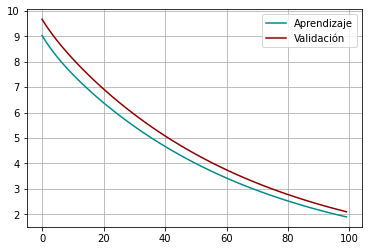

In [7]:
W1, b1, W2, b2 = neuralnet(X, Y, nodos=100, p_split=0.8, learning_rate=1e-6, 
                           epocas=100, fn_activation='relu')

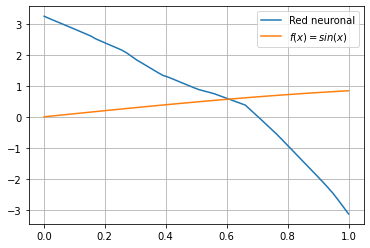

In [8]:
z = np.linspace(np.min(X), np.max(X), 60).reshape(-1, 1)

plt.plot(z, evaluate(z, W1, b1, W2, b2, relu),label='Red neuronal')
plt.plot(z, np.abs(np.sin(z)), label='$f(x)=sin(x)$')
plt.legend()
plt.grid()

# Intentando otra red

In [50]:
class Network(object):

    def __init__(self, sizes, fn_activation='relu'):
      
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
        if fn_activation == 'relu':
            self.activation = relu
            self.dactivation = drelu
        elif fn_activation == 'sigmoide':
            self.activation = sigmoid
            self.dactivation = dsigmoid
        elif fn_activation == 'tanh':
            self.activation = tanh
            self.dactivation = dtanh
        elif fn_activation == 'identidad':
            self.activation = iden
            self.dactivation = diden

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
# #             a = sigmoid(np.dot(w, a)+b)
#               a = relu(np.dot(w, a)+b)
                a = self.activation(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        if test_data is not None: 
            n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data is not None:
                print("Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
# #             activation = sigmoid(z)
            activation = self.activation(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * self.dactivation(zs[-1])
        #             sigmoid_prime(zs[-1])

        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
#             sp = sigmoid_prime(z)
            sp = self.dactivation(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)



In [51]:
net = Network([1,100,100, 1], fn_activation='sigmoide')
X_train, Y_train, X_test, Y_test = split(X, Y, 0.8)
train_data = np.concatenate((X_train,Y_train), axis=1)
test_data = np.concatenate((X_test,Y_test), axis=1)
type(test_data)

numpy.ndarray

In [52]:
net.SGD(train_data, epochs=50, mini_batch_size=10, eta=2)

Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete
Epoch 30 complete
Epoch 31 complete
Epoch 32 complete
Epoch 33 complete
Epoch 34 complete
Epoch 35 complete
Epoch 36 complete
Epoch 37 complete
Epoch 38 complete
Epoch 39 complete
Epoch 40 complete
Epoch 41 complete
Epoch 42 complete
Epoch 43 complete
Epoch 44 complete
Epoch 45 complete
Epoch 46 complete
Epoch 47 complete
Epoch 48 complete
Epoch 49 complete


In [53]:
z = np.linspace(0, 10, 100).reshape(1,100)
pred = net.feedforward(z)
np.shape(pred)

(1, 100)

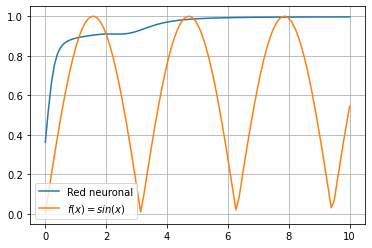

In [54]:
plt.plot(z.reshape(100,1), pred.reshape(100,1), label='Red neuronal')
plt.plot(z.reshape(100,1), np.abs(np.sin(z.reshape(100,1))), label='$f(x)=sin(x)$')
plt.legend()
plt.grid()